In [ ]:
import os
!unrar x /content/data.rar
os.listdir()

Streaming output truncated to the last 5000 lines.
Extracting  data/Training/Tomato 2/r_291_100.jpg                          94%  OK 
Extracting  data/Training/Tomato 2/r_292_100.jpg                          94%  OK 
Extracting  data/Training/Tomato 2/r_293_100.jpg                          94%  OK 
Extracting  data/Training/Tomato 2/r_294_100.jpg                          94%  OK 
Extracting  data/Training/Tomato 2/r_295_100.jpg                          94%  OK 
Extracting  data/Training/Tomato 2/r_296_100.jpg                          94%  OK 
Extracting  data/Training/Tomato 2/r_297_100.jpg                          94%  OK 
Extracting  data/Training/Tomato 2/r_298_100.jpg                          94%  OK 
Extracting  data/Training/Tomato 2/r_299_100.jpg                          94%  OK 
Extracting  data/Training/Tomato 2/r_2_100.jpg                            94%  OK 
Extracting  data/Training/Tom

['.config', 'data', '.ipynb_checkpoints', 'data.rar', 'sample_data']

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = '/content/Fruits Classification/train'
test_dir = '/content/Fruits Classification/test'

# Create ImageDataGenerator for preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # split the data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset using ImageDataGenerator.flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use a subset of the training data for training
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use the remaining subset of the training data for validation
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Define b CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')  # Update this line to match the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=3, validation_data=validation_generator)

# Print train accuracy
train_loss, train_accuracy = model.evaluate(train_generator)
print("Train Accuracy:", train_accuracy)

# Print test accuracy
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Save the model
model.save('fruit_classification_cnn_model.h5')


Found 7760 images belonging to 5 classes.
Found 1940 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Epoch 1/3
243/243 [==============================] - 432s 2s/step - loss: 1.2206 - accuracy: 0.4781 - val_loss: 1.1800 - val_accuracy: 0.4954
Epoch 2/3
243/243 [==============================] - 446s 2s/step - loss: 1.0595 - accuracy: 0.5635 - val_loss: 1.0824 - val_accuracy: 0.5515
Epoch 3/3
243/243 [==============================] - 157s 645ms/step - loss: 0.9996 - accuracy: 0.6009
Train Accuracy: 0.6009020805358887
4/4 [==============================] - 2s 324ms/step - loss: 0.8894 - accuracy: 0.6400
Test Accuracy: 0.6399999856948853


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 117ms/step


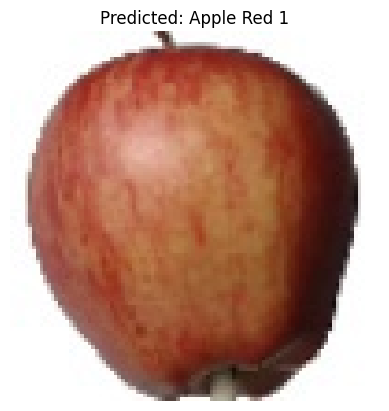

1/1 [==============================] - 0s 33ms/step


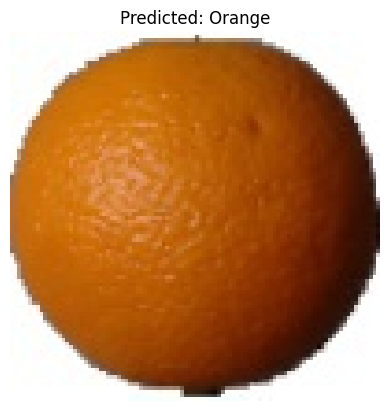

1/1 [==============================] - 0s 35ms/step


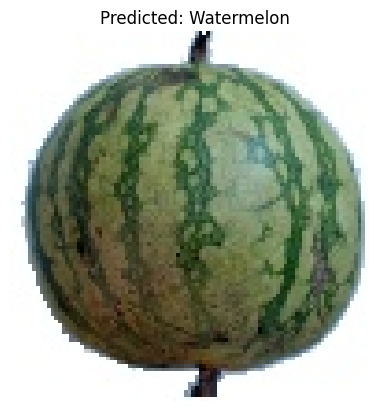

1/1 [==============================] - 0s 32ms/step


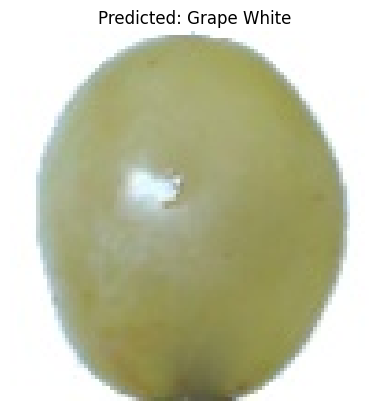

In [ ]:
import numpy as np
from keras.preprocessing import image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image


class_labels = [
    "Apple Braeburn",
    "Apple Crimson Snow",
    "Apple Golden 1",
    "Apple Golden 2",
    "Apple Golden 3",
    "Apple Granny Smith",
    "Apple Pink Lady",
    "Apple Red 1",
    "Apple Red 2",
    "Apple Red 3",
    "Apple Red Delicious",
    "Apple Red Yellow 1",
    "Apple Red Yellow 2",
    "Apricot",
    "Avocado",
    "Avocado ripe",
    "Banana",
    "Banana Lady Finger",
    "Banana Red",
    "Beetroot",
    "Blueberry",
    "Cactus fruit",
    "Cantaloupe 1",
    "Cantaloupe 2",
    "Carambula",
    "Cauliflower",
    "Cherry 1",
    "Cherry 2",
    "Cherry Rainier",
    "Cherry Wax Black",
    "Cherry Wax Red",
    "Cherry Wax Yellow",
    "Chestnut",
    "Clementine",
    "Cocos",
    "Corn",
    "Corn Husk",
    "Cucumber Ripe",
    "Cucumber Ripe 2",
    "Dates",
    "Eggplant",
    "Fig",
    "Ginger Root",
    "Granadilla",
    "Grape Blue",
    "Grape Pink",
    "Grape White",
    "Grape White 2",
    "Grape White 3",
    "Grape White 4",
    "Grapefruit Pink",
    "Grapefruit White",
    "Guava",
    "Hazelnut",
    "Huckleberry",
    "Kaki",
    "Kiwi",
    "Kohlrabi",
    "Kumquats",
    "Lemon",
    "Lemon Meyer",
    "Limes",
    "Lychee",
    "Mandarine",
    "Mango",
    "Mango Red",
    "Mangostan",
    "Maracuja",
    "Melon Piel de Sapo",
    "Mulberry",
    "Nectarine",
    "Nectarine Flat",
    "Nut Forest",
    "Nut Pecan",
    "Onion Red",
    "Onion Red Peeled",
    "Onion White",
    "Orange",
    "Papaya",
    "Passion Fruit",
    "Peach",
    "Peach 2",
    "Peach Flat",
    "Pear",
    "Pear 2",
    "Pear Abate",
    "Pear Forelle",
    "Pear Kaiser",
    "Pear Monster",
    "Pear Red",
    "Pear Stone",
    "Pear Williams",
    "Pepino",
    "Pepper Green",
    "Pepper Orange",
    "Pepper Red",
    "Pepper Yellow",
    "Physalis",
    "Physalis with Husk",
    "Pineapple",
    "Pineapple Mini",
    "Pitahaya Red",
    "Plum",
    "Plum 2",
    "Plum 3",
    "Pomegranate",
    "Pomelo Sweetie",
    "Potato Red",
    "Potato Red Washed",
    "Potato Sweet",
    "Potato White",
    "Quince",
    "Rambutan",
    "Raspberry",
    "Redcurrant",
    "Salak",
    "Strawberry",
    "Strawberry Wedge",
    "Tamarillo",
    "Tangelo",
    "Tomato 1",
    "Tomato 2",
    "Tomato 3",
    "Tomato 4",
    "Tomato Cherry Red",
    "Tomato Heart",
    "Tomato Maroon",
    "Tomato Yellow",
    "Tomato not Ripened",
    "Walnut",
    "Watermelon"
]

# Load the saved model
model = load_model('/content/fruit_classification_cnn_model.h5')

# Function to preprocess a new image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale as was done in training
    return img_array

# Function to classify and display the image
def classify_and_display_image(img_path, class_labels):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    # Display the image and the prediction
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Assuming you have a list of class labels in the same order as the model's output
#class_labels = list(train_generator.class_indices.keys())

# Example usage
img_path = '/content/131class/12_100.jpg'
classify_and_display_image(img_path, class_labels)
img_path = '/content/131class/13_100.jpg'
classify_and_display_image(img_path, class_labels)
img_path = '/content/131class/5_100.jpg'
classify_and_display_image(img_path, class_labels)
img_path = '/content/131class/6_100.jpg'
classify_and_display_image(img_path, class_labels)